In [14]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
import PyComplexHeatmap
print(PyComplexHeatmap.__version__)
from PyComplexHeatmap import *

1.6.6.dev15+gd9f20b3


In [15]:
#set font to Arial using the following code
plt.rcParams['font.family']='sans serif'
plt.rcParams['font.sans-serif']='Arial'
# set pdf.fonttype to 42
plt.rcParams['pdf.fonttype']=42

In [16]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

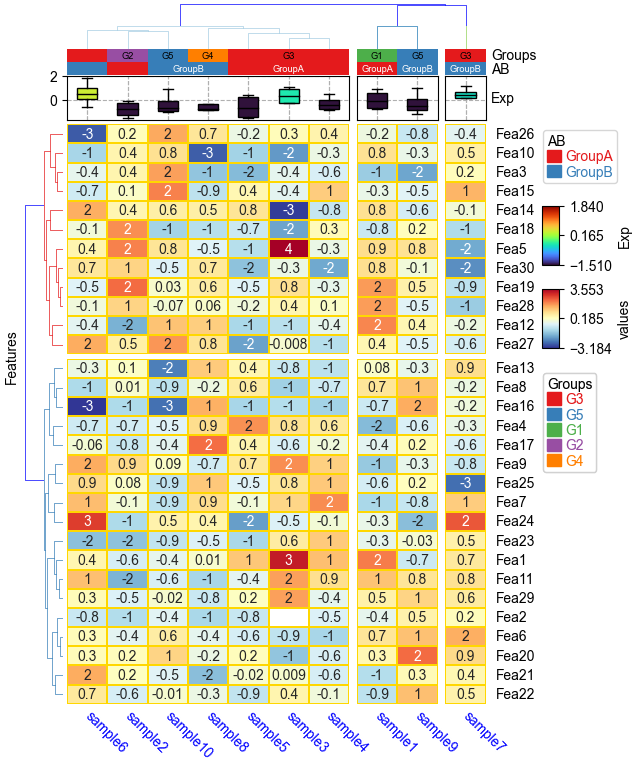

In [18]:
df['Groups']=['G1']+['G2']+['G3']*5+['G4']+['G5']*2
col_ha = HeatmapAnnotation(
            Groups=anno_simple(df.Groups,add_text=True,text_kws={'color':'black'}),
            AB=anno_simple(df.AB,add_text=True),axis=1,
            Exp=anno_boxplot(df_box, cmap='turbo'),
            verbose=0) #verbose=0 will turn off the log.

plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,
        col_split=3,
        col_split_gap=2,col_cluster=True,
        row_cluster=True,col_dendrogram=True,
        row_split=2,row_split_gap=1,row_dendrogram=True,
        label='values',show_rownames=True,show_colnames=True,
        tree_kws={'colors':'blue','row_cmap':'Set1','col_cmap':'Paired'},
        verbose=0,legend_gap=7,
        annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
        ylabel='Features')
plt.show()

In [ ]:
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]

df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

plt.figure(figsize=(3.5, 5))
cm = ClusterMapPlotter(
        data=df_heatmap,
        col_cluster=True,row_cluster=True,
        col_split=df.AB,row_split=2, 
        col_split_gap=0.5,row_split_gap=0.8,
        label='values',row_dendrogram=True,
        show_rownames=False,show_colnames=True,
        tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
        cmap='parula',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'},
        ylabel="Features",xlabel="Samples")
# plt.savefig("example0.pdf", bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(3.5, 5))
cm = ClusterMapPlotter(
        data=df_heatmap,
        col_cluster=True,row_cluster=True,
        col_split=df.AB,row_split=2, 
        col_split_gap=0.5,row_split_gap=0.8,
        label='values',row_dendrogram=True,
        show_rownames=True,show_colnames=True,
        row_names_side='right',yticklabels=True,
        tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
        cmap='meth2',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
plt.show()